<h1><center>Statistics EDA by Seaborn and Feature Engineering For Beginners</center></h1>


## Content

1. [Dataset](#1.-Dataset)
2. [Univariate visualization](#2.-Univariate-visualization)
    * 2.1 [Quantitative features](#2.1-Quantitative-features)
        * [Histograms and density plots](#Histograms-and-density-plots)
        * [Box plot](#Box-plot)
        * [Violin plot](#Violin-plot)
        * [describe()](#describe())  
        
    * 2.2 [Qualitative "Categorical and binary" features](#2.2-Qualitative-"Categorical-and-binary"-features)
        * [Frequency table](#Frequency-table)
        * [Count plot](#Count-plot)
        * [Bar plot](#Bar-plot)
        * [Pie chart](#Pie-chart)
3. [Multivariate visualization](#3.-Multivariate-visualization)
    * 3.1 [Quantitative vs. Quantitative](#3.1-Quantitative-vs.-Quantitative)
        * [Correlation matrix](#Correlation-matrix)
        * [Scatter plot](#Scatter-plot)
        * [Joint plot](#Joint-plot)
        * [Scatter plot matrix "pair plot"](#Scatter-plot-matrix-"pair-plot")
    * 3.2 [Quantitative vs. Qualitative](#3.2-Quantitative-vs.-Qualitative)
        * [lmplot](#lmplot)
        * [Bar plot](#Bar-plot)
        * [Cat plot](#Cat-plot)
    * 3.3 [Qualitative vs. Qualitative](#3.3-Qualitative-vs.-Qualitative)
        * [Count plot](#Count-plot)
        * [Contingency table "cross tabulation"](#Contingency-table-"cross-tabulation")
        * [Group by](#Group-by)
4. [Feature Engineering](#Feature-Engineering)
4. [Resources](#5.-Resources)

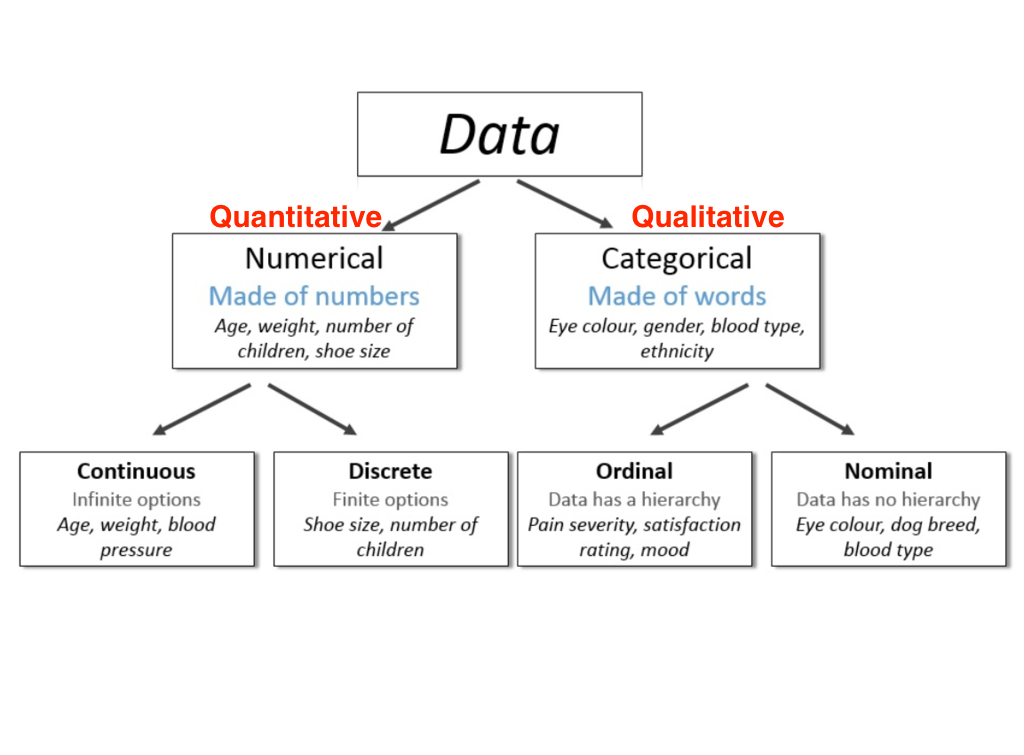

In [750]:
from IPython.display import Image
Image(filename= 'Data_types.png')

### 1. Dataset
In the data discovery analysis, we will firstly recognize and analyze our data using a wide variety of functions in the pandas library.



In [644]:
# We need to install a wide variety of libraries. For this we will install pandas, numpy, seaborn and matplotlib libraries.

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


In [645]:
data = pd.read_csv('StudentsPerformance.csv')

In [646]:
data.head() # see first 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Here is the description of our features:

|  Name  | Value Type | Statistical Type |
|---         |---       |--- 
| **gender** | String | Categorical/Binary |
| **race/ethnicity** |String | Categorical/Ordinal |
| **parental level of education** |String | Categorical/Ordinal |
| **lunch** | String | Categorical/Binary |
| **test preparation course** | String | Categorical/Binary |
| **math score** | Numerical | Quantitative |
| **reading score** | Numerical | Quantitative |
| **writing score** | Numerical | Quantitative|



In [647]:
# shows the analysis of numerical values.
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [648]:
# showing if any feature has at least one null value
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [649]:
# count null values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [650]:
# showing cols names
for col in data.columns:
    print(col)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


We should rename cols names, just make it as a `title` and `replace spaces with -`

In [651]:
# renaming columns names
data.columns = [col.title().replace(' ','_') for col in data.columns]

# new cols names
for col in data.columns:
    print(col)

Gender
Race/Ethnicity
Parental_Level_Of_Education
Lunch
Test_Preparation_Course
Math_Score
Reading_Score
Writing_Score


## 2. Univariate visualization
* Univariate analysis looks at `one feature` at a time
* When we analyze a feature independently, we are usually mostly `interested in the distribution of its values` and ignore other features in the dataset

### 2.1 Quantitative features

Quantitative features take on ordered **numerical values**. Those values can be `discrete`, like integers, or `continuous`, like real numbers, and usually express a count or a measurement.

#### Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its `histogram` using the `DataFrame`'s method `hist()`. 

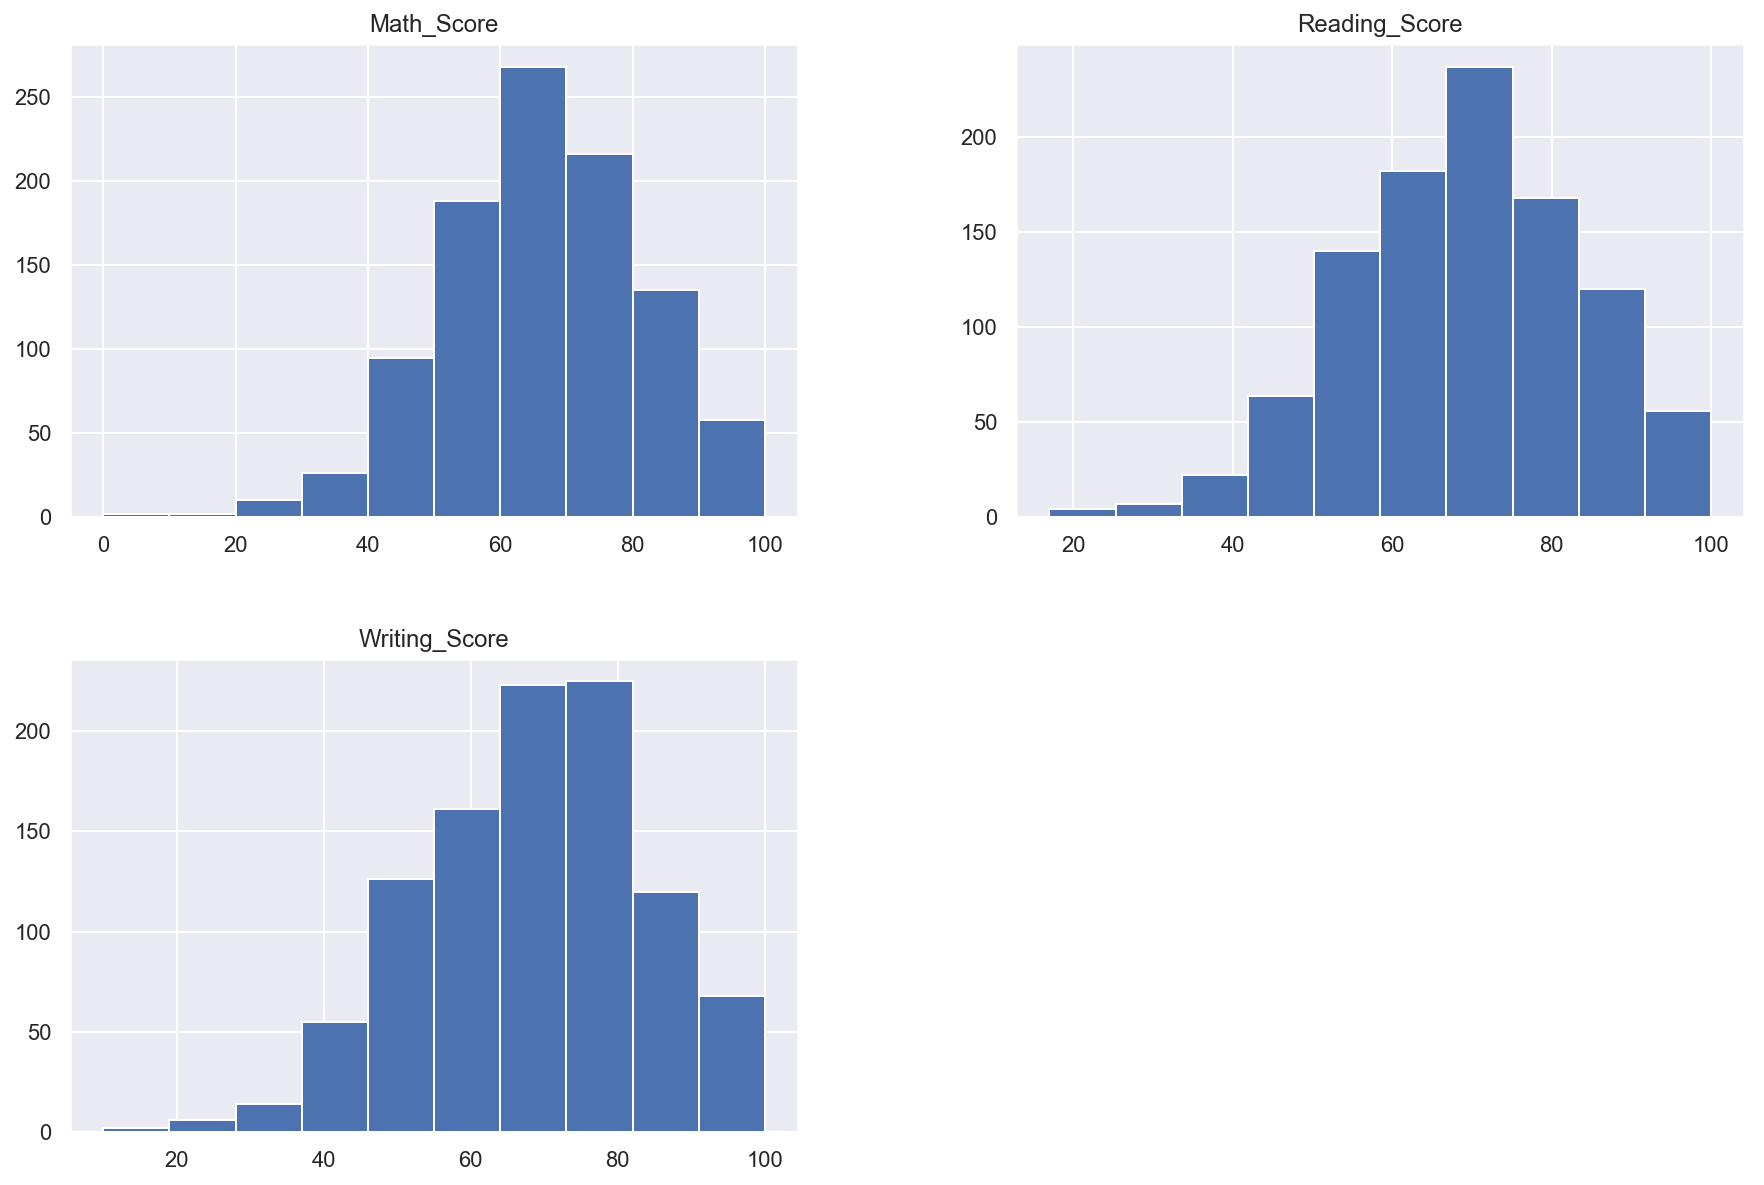

In [652]:
numerical_features = ['Math_Score', 'Reading_Score', 'Writing_Score']
data[numerical_features].hist(figsize=(15,10));

A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc.

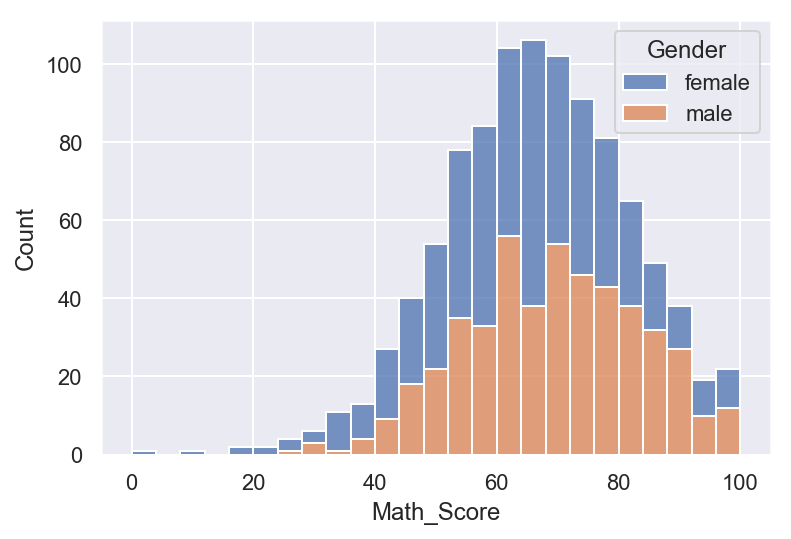

In [653]:
sns.histplot(data= data, x= 'Math_Score', hue= 'Gender', multiple= 'stack');


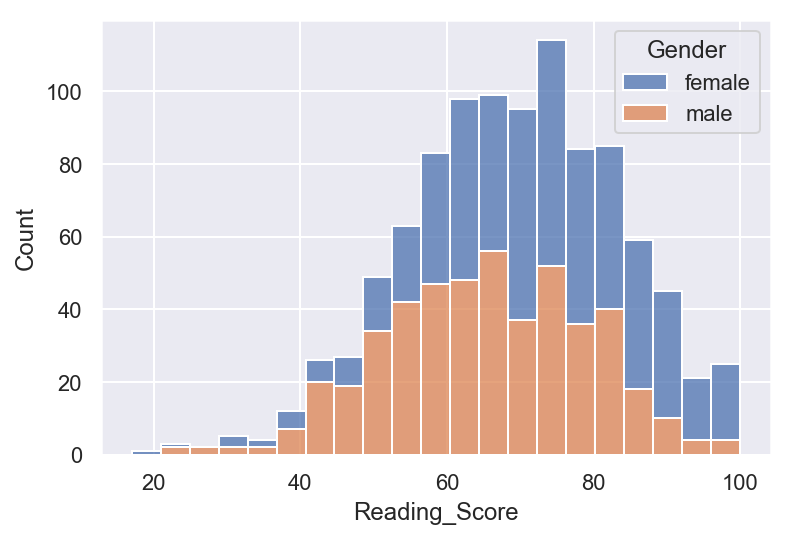

In [654]:
sns.histplot(data= data, x= 'Reading_Score', hue= 'Gender', multiple= 'stack');


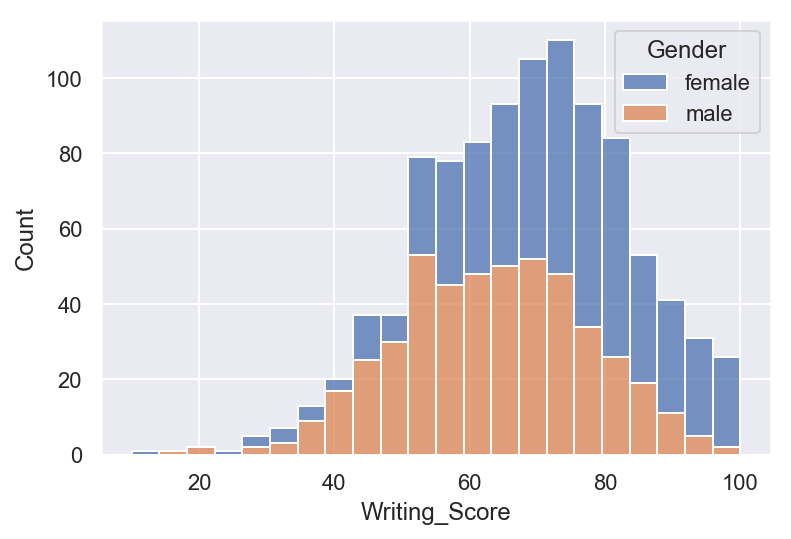

In [655]:
sns.histplot(data= data, x= 'Writing_Score', hue= 'Gender', multiple= 'stack');


**For each score, females get high score more than male!**

 is also possible to plot a distribution of observations with `seaborn`'s `distplot()`

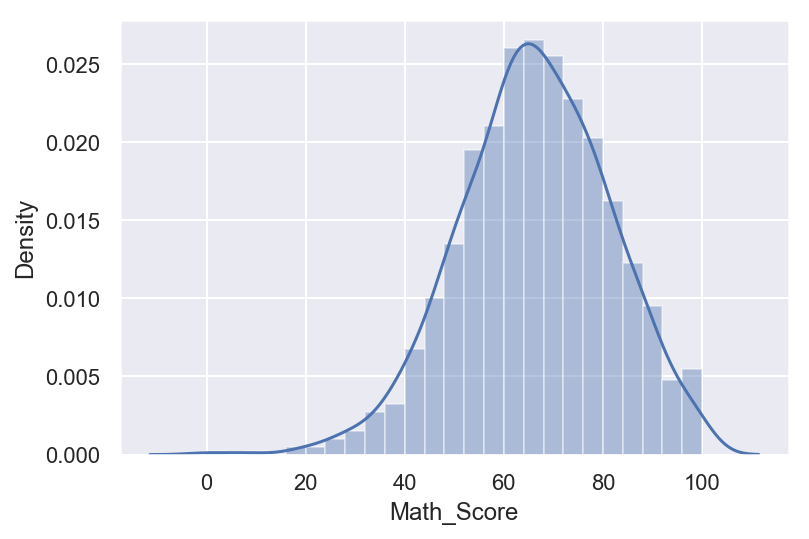

In [656]:
sns.distplot(data['Math_Score']);

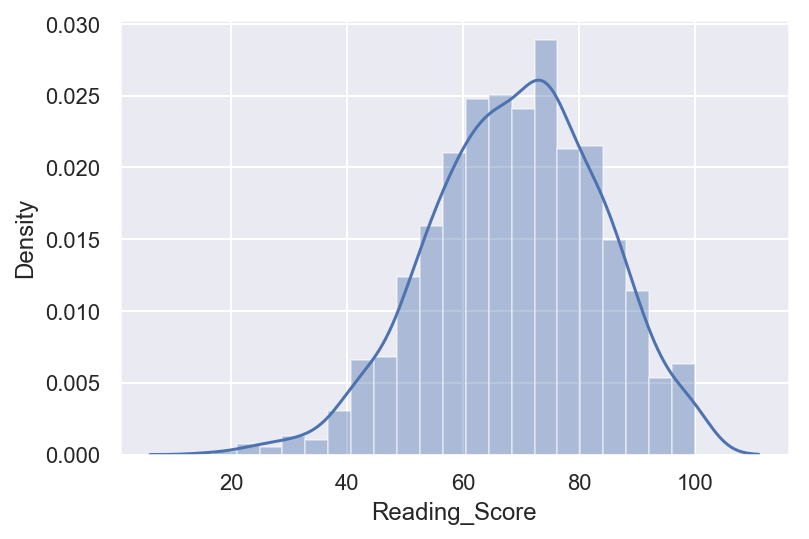

In [657]:
sns.distplot(data['Reading_Score']);

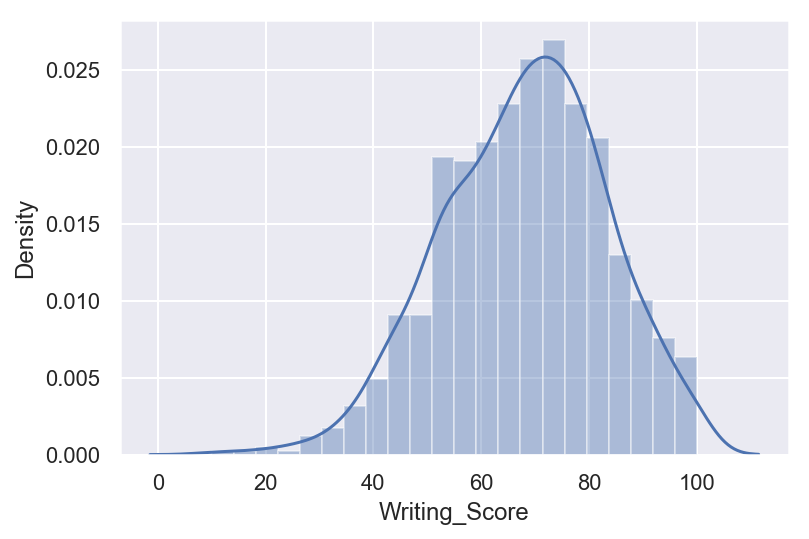

In [658]:
sns.distplot(data['Writing_Score']);

#### Box plot

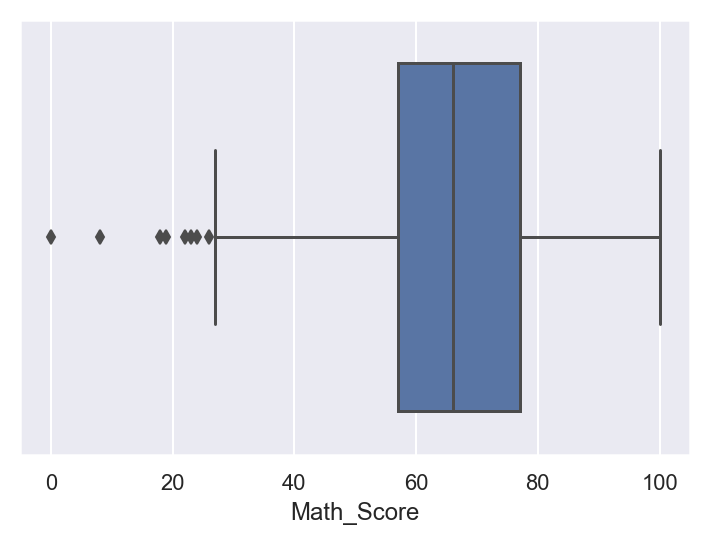

In [659]:
sns.boxplot(data= data, x= 'Math_Score');

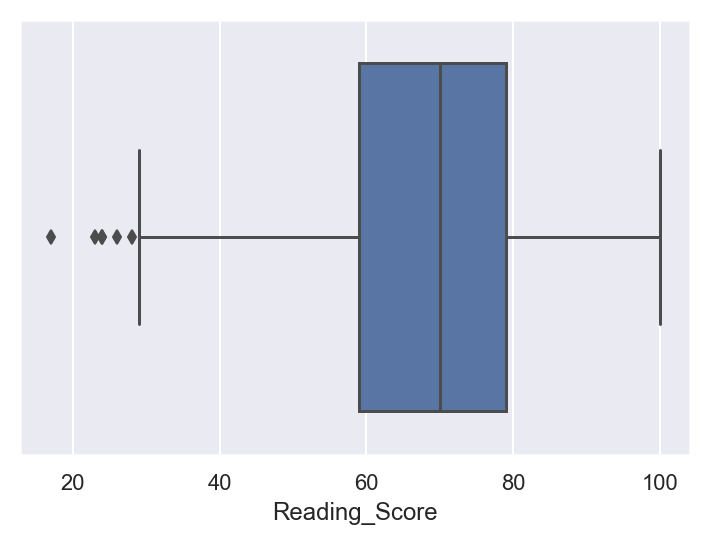

In [660]:
sns.boxplot(data= data, x= 'Reading_Score');

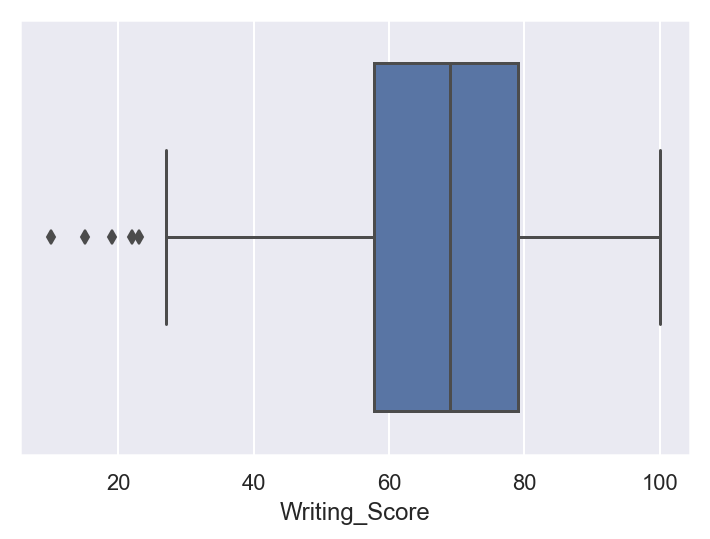

In [661]:
sns.boxplot(data= data, x= 'Writing_Score');

Let's see how to interpret a box plot. Its components are a box (obviously, this is why it is called a box plot), the so-called `whiskers`, and a number of individual points (`outliers`).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the  25𝑡ℎ(Q1)  and  75𝑡ℎ(Q3)  percentiles. The vertical line inside the box marks the median ( 50% ) of the distribution.

The `whiskers are the lines extending from the box`. They represent the entire scatter of data points, specifically the points that fall within the interval  (Q1−1.5⋅IQR,Q3+1.5⋅IQR) , where  `IQR=Q3−Q1`  is the `interquartile range`.

**`Outliers that fall outside of the range bounded by the whiskers` are plotted individually as black points along the central axis, Outliers are calculated in three steps:**
* 1. Find Inter Quartile Range (IQR) by subtracting the 25th percentile from the 75th: `75% — 25%
* 2. The lower outlier limit is calculated by subtracting 1.5 times of IQR from the 25th: `25% — 1.5*IQR`
* 3. The upper outlier limit is calculated by adding 1.5 times of IQR to the 75th: `75% + 1.5*IQR`


**What is quantile?**

* What if it's `odd` set of numbers? Find the IQR for the following data set [4,4,10,11,15,7,14,12,6]
    * <font color='blue'>step1</font>: Put the numbers in order [4,4,6,7,10,11,12,14,15]
    * <font color='blue'>step2</font>: find the `median` [4,4,6,7,**10**,11,12,14,15]
    * <font color='blue'>step3</font>: Place parentheses around the numbers above and below the median [(4,4,6,7),**10**,(11,12,14,15)]
    * <font color='blue'>step4</font>: find Q1 and Q3 [(4,4,6,7),**10**,(11,12,14,15)]
    .. Q1 = (4+6)/2 = 5, Q3 = (12+14)/2=13
    * <font color='blue'>step5</font>: find the IQR = Q3 - Q1 = 13 - 5 = 8
---
* What if it's `even` set of numbers? Find the IQR for the following data set [4,4,10,11,15,7,14,12,6,16]

    * <font color='blue'>step1</font>: Put the numbers in order [4,4,6,7,10,11,12,14,15, 16]
    * <font color='blue'>step2</font>: find the `median` [4,4,6,7,**10,11**,12,14,15,16] = (10+11) / 2 = 11
    * <font color='blue'>step3</font>: make a `mark in the center` of the data [4,4,6,7,10, |11,12,14,15,16] 
    * <font color='blue'>step4</font>: Place parentheses around the numbers above and below the mark [(4,4,6,7,10)|,(11,12,14,15,16)]
    * <font color='blue'>step5</font>: find Q1 and Q3 [(4,4,6,7,10),|(11,12,14,15,16)]
    .. Q1 = 6, Q3 = 14
    * <font color='blue'>step6</font>: find the IQR = Q3 - Q1 = 14 - 6 = 8
    
   

#### Violin plot

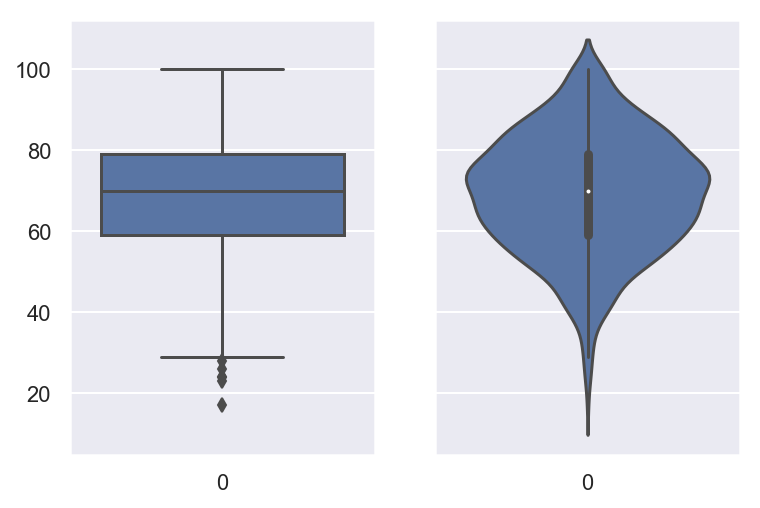

In [662]:
_, axes = plt.subplots(nrows=1,ncols=2,
                       sharey= True, figsize=(6,4))
sns.boxplot(data= data['Reading_Score'], ax= axes[0]);
sns.violinplot(data= data['Reading_Score'], ax= axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box.

#### describe()


In [663]:
data[numerical_features].describe()

,Math_Score,Reading_Score,Writing_Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* Count : Shows the total number.
* Mean  : Shows the average.
* Std   :  Standard deviation value
* Min   : Minimum value
* %25   : First Quantile
* %50   : Median or Second Quantile
* %75   : Third Quantile
* Max   : Maximum value

Its output is mostly self-explanatory. 25%, 50% and 75% are the corresponding `percentiles`.


### 2.2 Qualitative "Categorical and binary" features

* Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. 

* Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called `ordinal`.


#### Frequency table


In [664]:
catigorical_features = ['Gender', 'Race/Ethnicity', 'Parental_Level_Of_Education'
           , 'Lunch', 'Test_Preparation_Course']

In [665]:
for col in catigorical_features:
    print('-'*50)
    print(f'The column name is: {col}')
    print(data[col].value_counts())
    

--------------------------------------------------
The column name is: Gender
female    518
male      482
Name: Gender, dtype: int64
--------------------------------------------------
The column name is: Race/Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64
--------------------------------------------------
The column name is: Parental_Level_Of_Education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Level_Of_Education, dtype: int64
--------------------------------------------------
The column name is: Lunch
standard        645
free/reduced    355
Name: Lunch, dtype: int64
--------------------------------------------------
The column name is: Test_Preparation_Course
none         642
completed    358
Name: Test_Preparation_Course, dtype: int64


#### Count plot 
The bar plot is a graphical representation of the frequency table

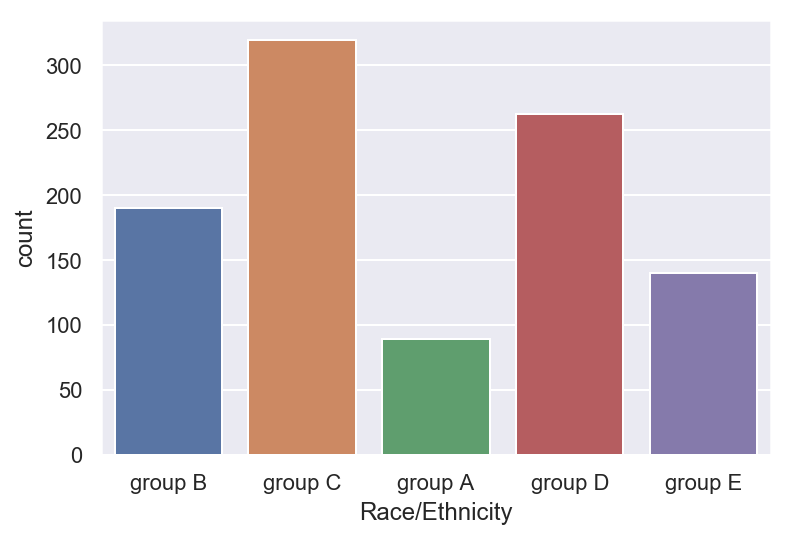

In [666]:
sns.countplot(x= 'Race/Ethnicity', data= data);

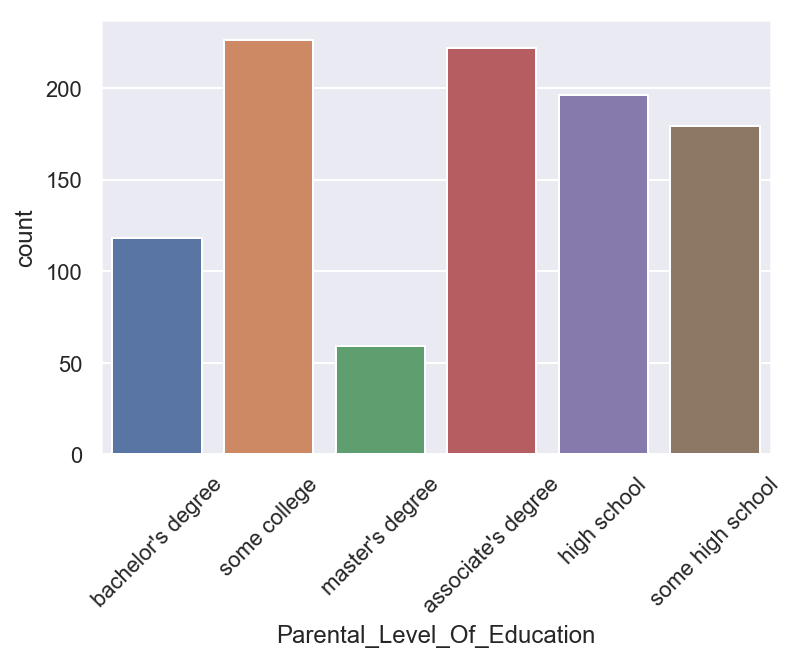

In [667]:
sns.countplot(x= 'Parental_Level_Of_Education', data= data)
plt.xticks(rotation= 45);

# plt.xticks(size=7); # or decrease the font size

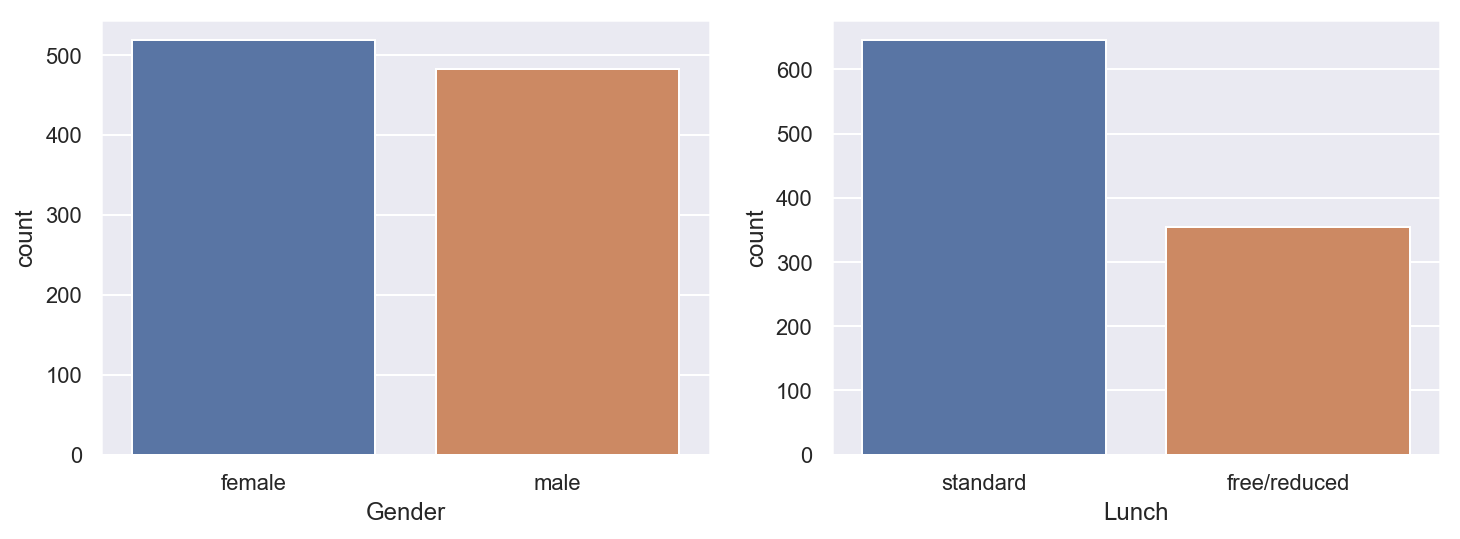

In [668]:
_, axes = plt.subplots(nrows=1, ncols=2,
                      figsize=(12,4))
sns.countplot(x= 'Gender', data= data, ax= axes[0])
sns.countplot(x= 'Lunch', data= data, ax= axes[1]);

####  Bar plot

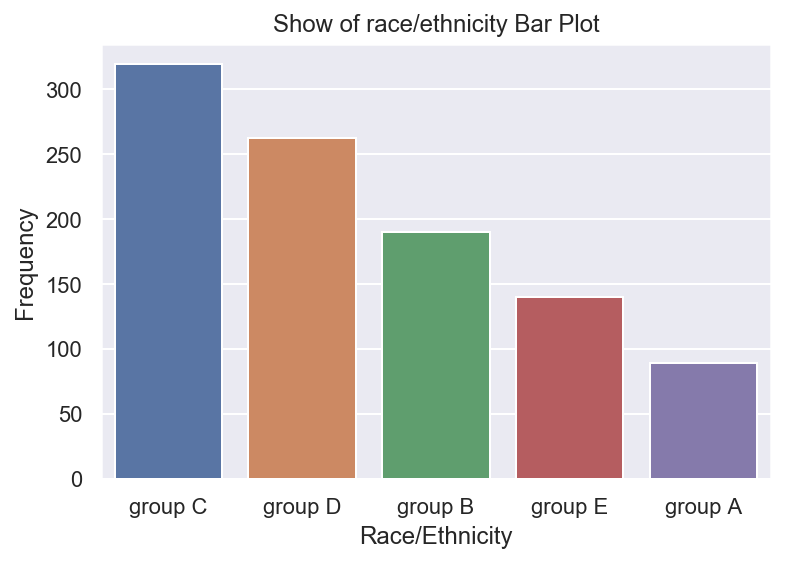

In [669]:
sns.barplot(x= data['Race/Ethnicity'].value_counts().index,
           y= data['Race/Ethnicity'].value_counts().values)

plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Show of race/ethnicity Bar Plot')
plt.show();


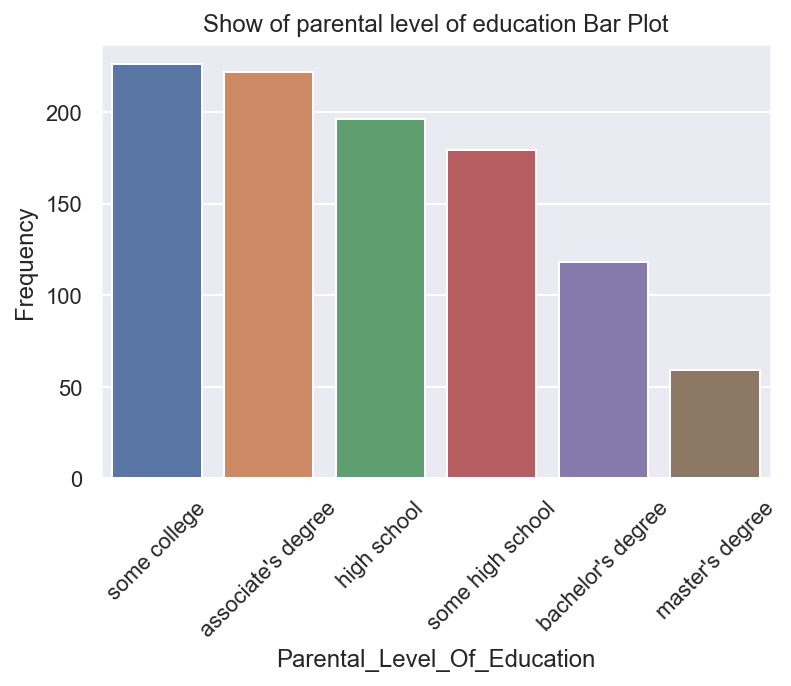

In [670]:
sns.barplot(x= data['Parental_Level_Of_Education'].value_counts().index,
           y= data['Parental_Level_Of_Education'].value_counts().values)

plt.xticks(rotation= 45)

plt.xlabel('Parental_Level_Of_Education')
plt.ylabel('Frequency')
plt.title('Show of parental level of education Bar Plot')
plt.show();


#### Pie chart

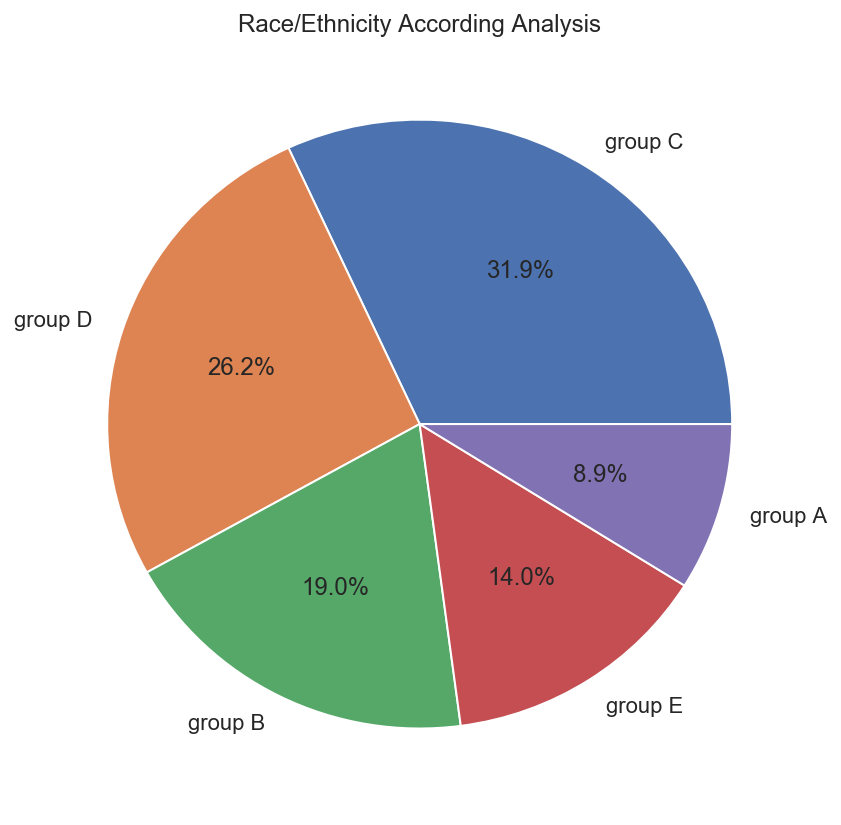

In [671]:
labels=data['Race/Ethnicity'].value_counts().index
values=data['Race/Ethnicity'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values ,labels = labels ,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis')
plt.show()

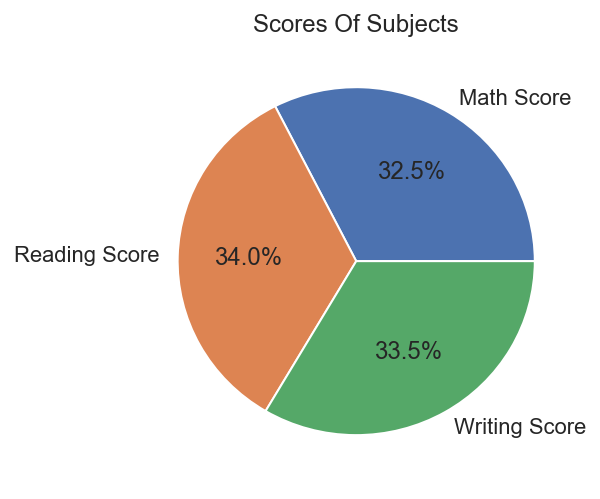

In [672]:
labels=['Math Score', 'Reading Score', 'Writing Score']
values=[data['Math_Score'].mean(),data['Reading_Score'].mean(),data['Writing_Score'].mean()]

#visualization
plt.figure(figsize=(4,4))
plt.pie(values, labels= labels, autopct='%1.1f%%')
plt.title('Scores Of Subjects')
plt.show();

## 3. Multivariate visualization
Multivariate plots allow us to see relationships between two and more different variables

### 3.1 Quantitative vs. Quantitative

#### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method `corr()` on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to `heatmap()` from `seaborn`, which renders a color-coded matrix for the provided values:


In [673]:
corr_matrix = data[numerical_features].corr()
corr_matrix 

,Math_Score,Reading_Score,Writing_Score
Math_Score,1.000000,0.817580,0.802642
Reading_Score,0.817580,1.000000,0.954598
Writing_Score,0.802642,0.954598,1.000000


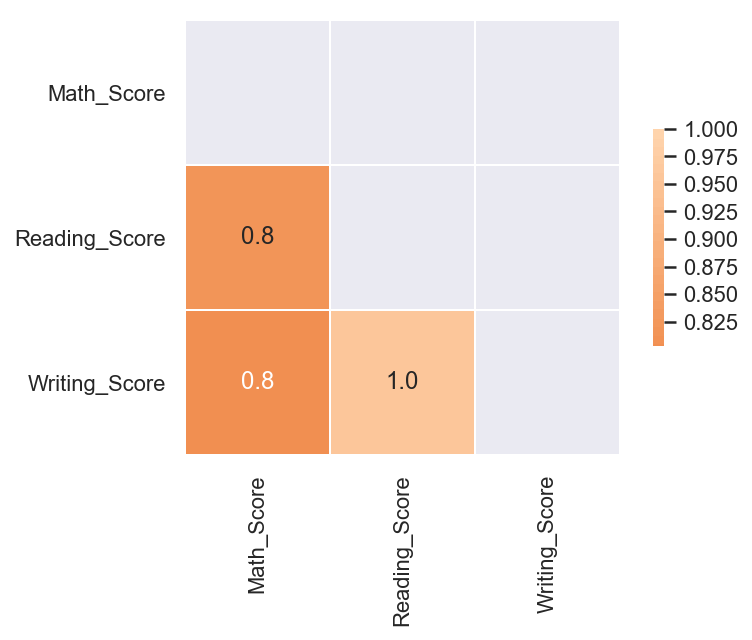

In [674]:
corr = data[numerical_features].corr()

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [675]:
data.corrwith(data['Math_Score']).sort_values(ascending=False)

Math_Score       1.000000
Reading_Score    0.817580
Writing_Score    0.802642
dtype: float64

#### Scatter plot
The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

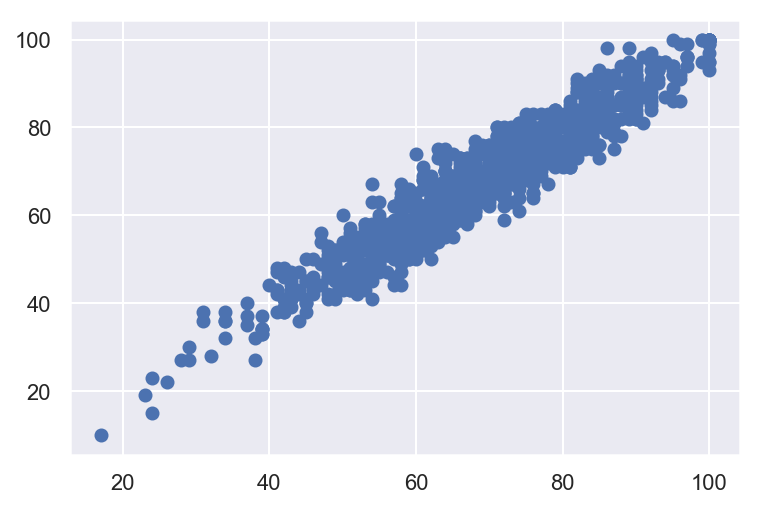

In [676]:
plt.scatter(data['Reading_Score'], data['Writing_Score']);

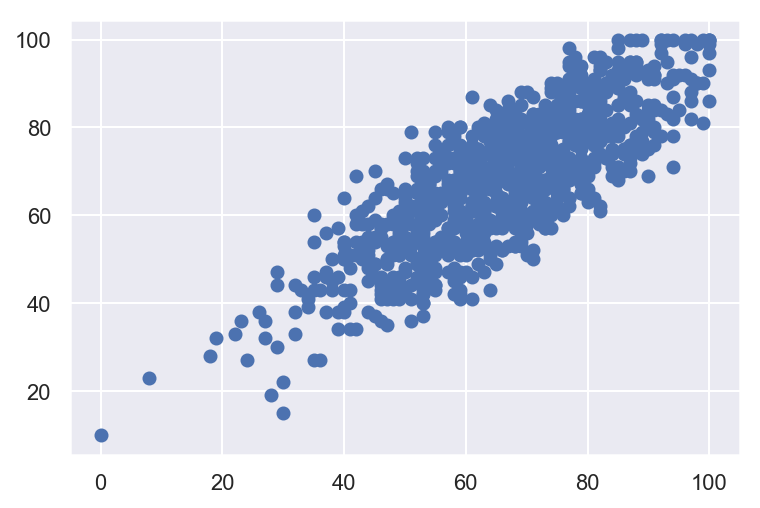

In [677]:
plt.scatter(data['Math_Score'], data['Writing_Score']);

We get an interesting picture corrlated variables

#### Joint plot

There is a slightly fancier option to create a scatter plot with the `seaborn` library:



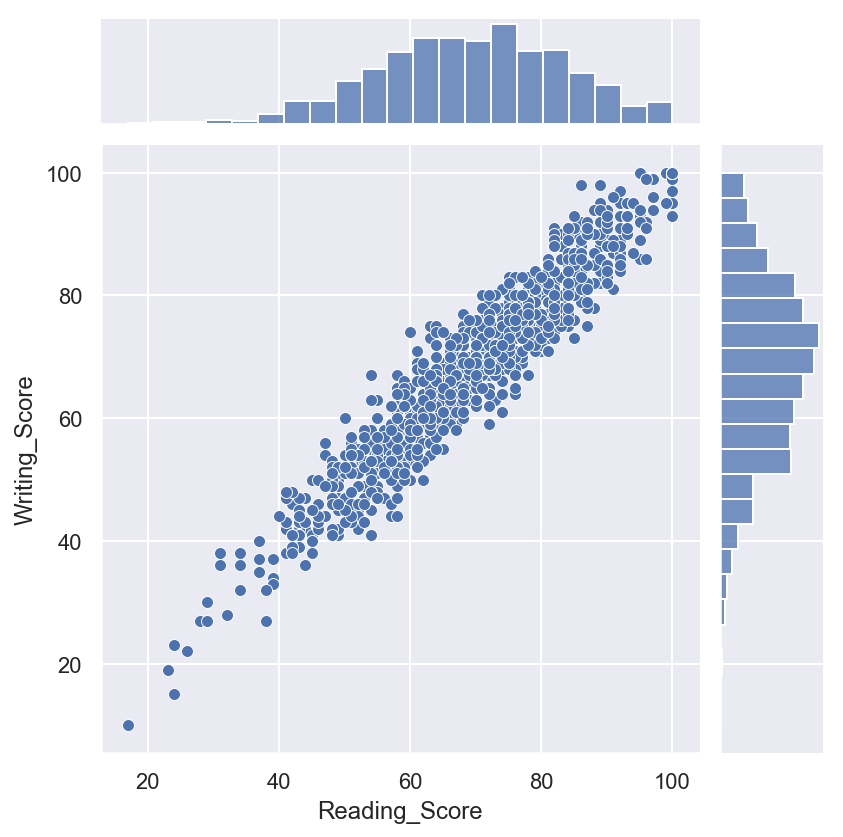

In [678]:
sns.jointplot(data= data, x= 'Reading_Score', y= 'Writing_Score', kind= 'scatter');

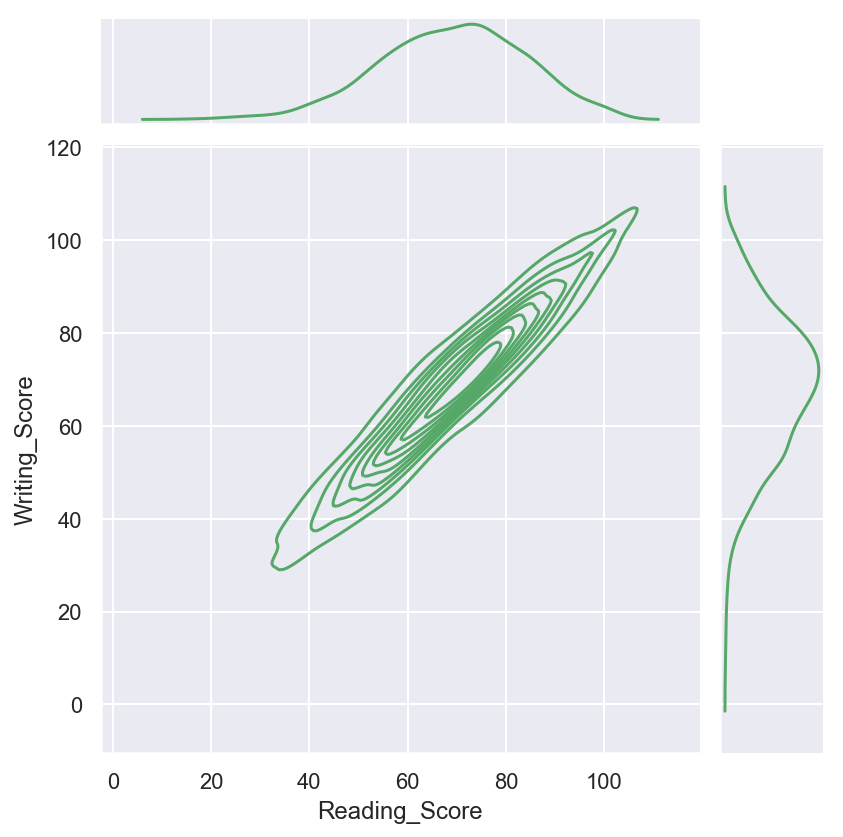

In [679]:
sns.jointplot(data= data, x= 'Reading_Score', y= 'Writing_Score',
              kind= 'kde', color= 'g');

#### Scatter plot matrix "pair plot"

In some cases, we may want to plot a scatterplot matrix such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.



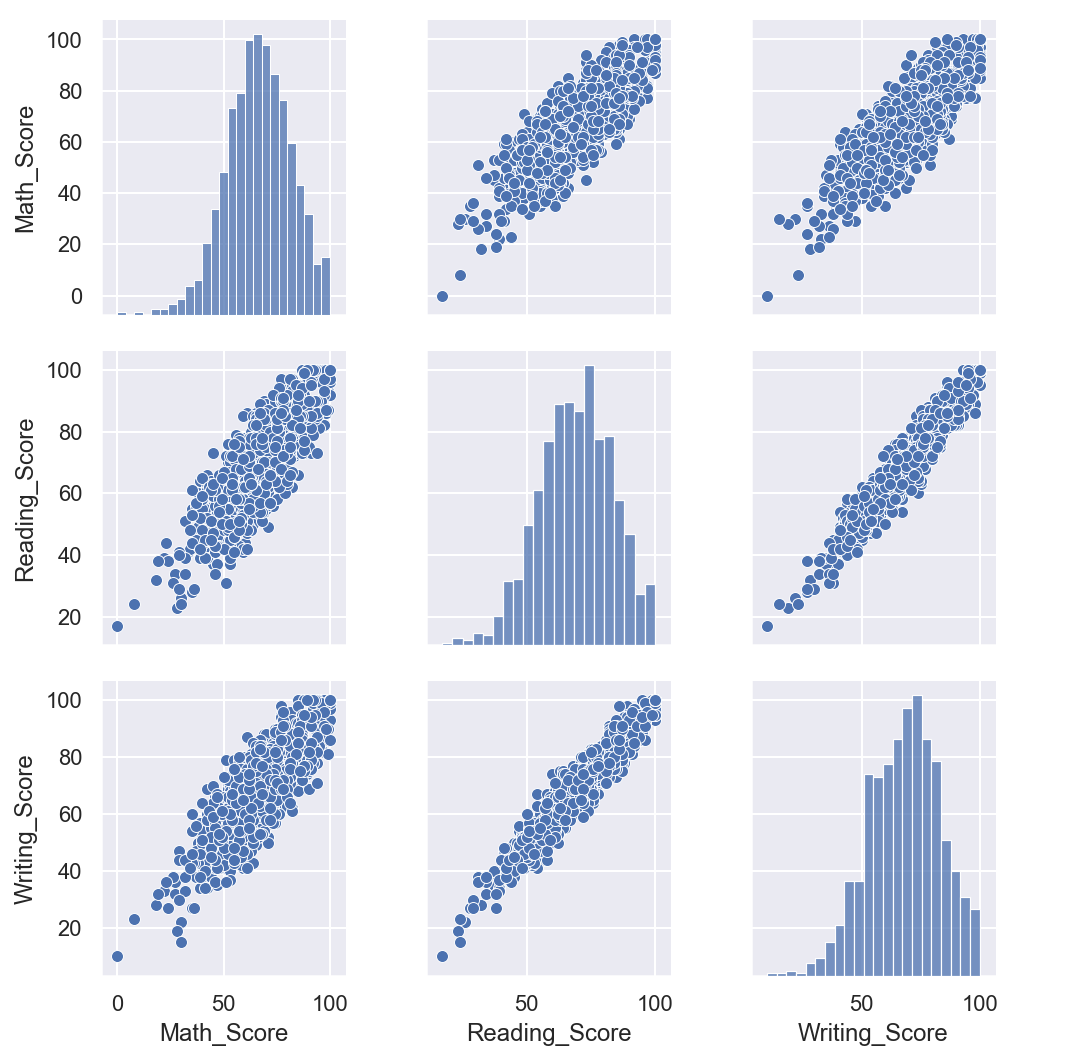

In [680]:
sns.pairplot(data[numerical_features]);

### 3.2 Quantitative vs. Qualitative 

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the `scatter()` function seen above, but, let's try a new function called [lmplot()](https://seaborn.pydata.org/generated/seaborn.lmplot.html) and use the parameter hue to indicate our categorical feature of interest:

#### lmplot

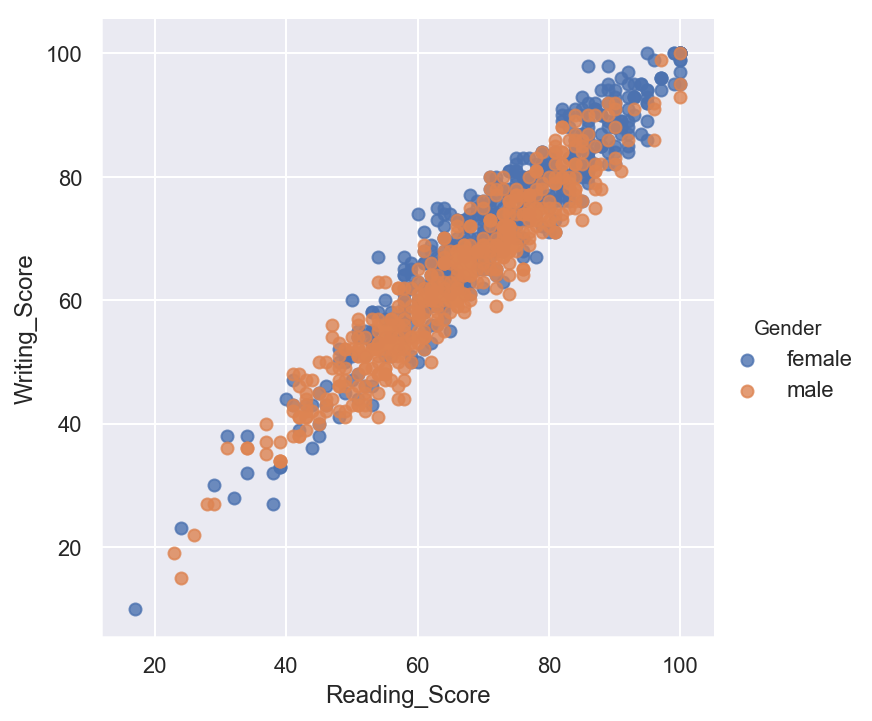

In [681]:
sns.lmplot(data= data, x= 'Reading_Score', 
          y= 'Writing_Score', hue= 'Gender', fit_reg= False);

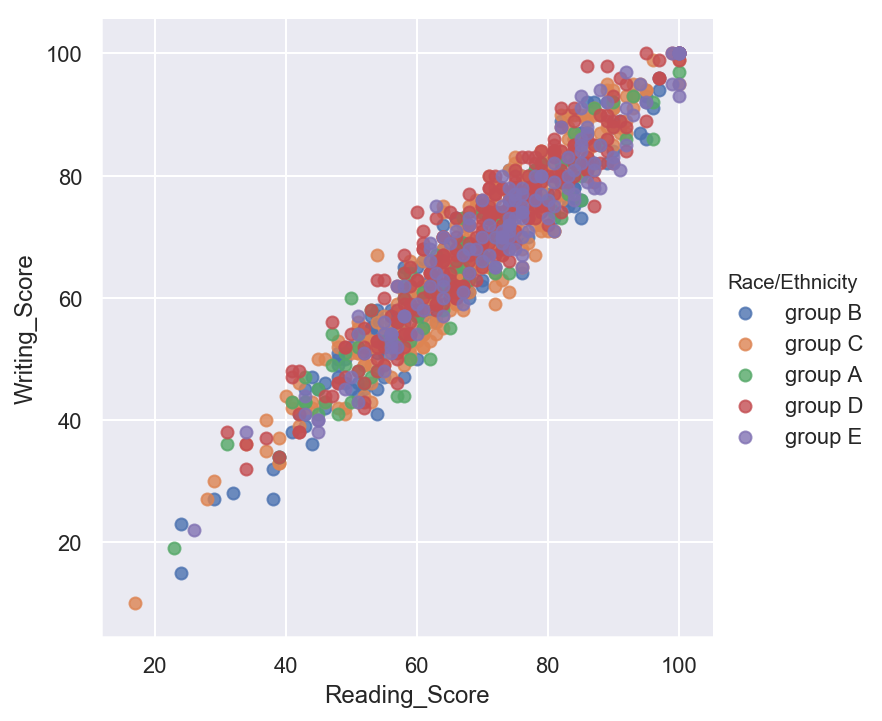

In [682]:
sns.lmplot(data= data, x= 'Reading_Score', 
          y= 'Writing_Score', hue= 'Race/Ethnicity', fit_reg= False);

#### Bar plot

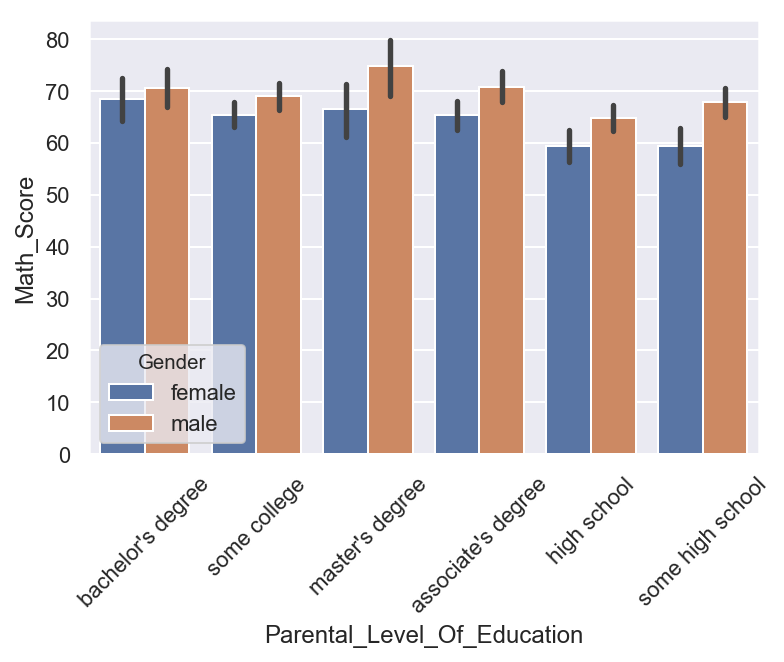

In [683]:
sns.barplot(data= data, x='Parental_Level_Of_Education',
              y='Math_Score',
              hue= 'Gender')
plt.xticks(rotation= 45);

# plt.xticks(size=7); # or decrease the font size

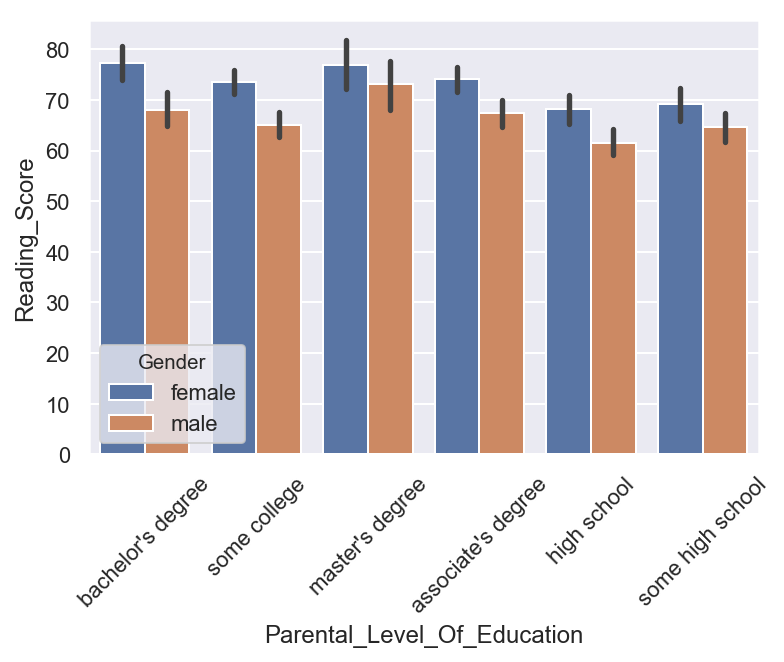

In [684]:
sns.barplot(data= data, x='Parental_Level_Of_Education',
              y='Reading_Score',
              hue= 'Gender')
plt.xticks(rotation= 45);

# plt.xticks(size=7); # or decrease the font size

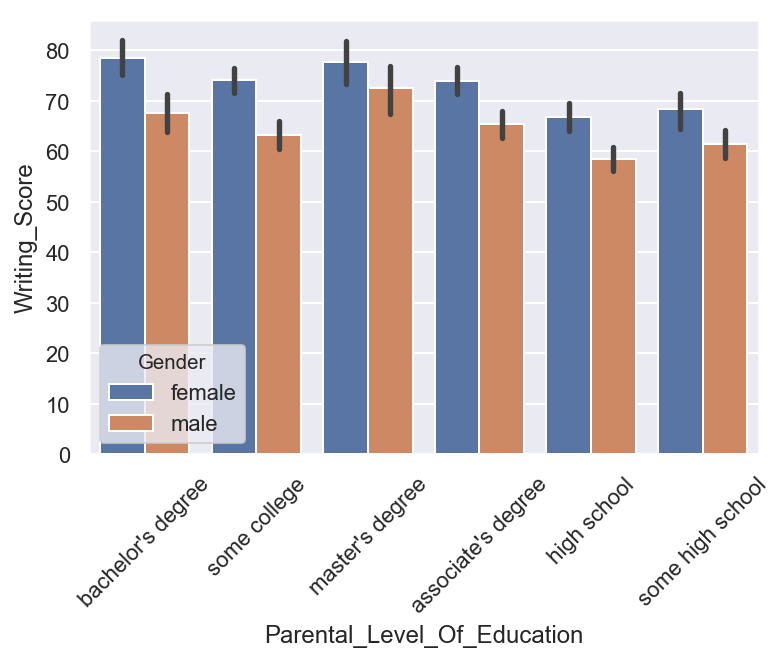

In [685]:
sns.barplot(data= data, x='Parental_Level_Of_Education',
              y='Writing_Score',
              hue= 'Gender')
plt.xticks(rotation= 45);

# plt.xticks(size=7); # or decrease the font size

#### Cat plot

* Used to show the relationship between a numerical and one or more categorical variables using one of several visual representations.
* Same advantages of `relplot()`
* Easily create subplots with `col=` and `row=`
* Used for ploting as a `count` , `bar` , `box` and `viloin`
* `CI"Confidence Intervals"` in bar plor: black lines at the top of each bar represent 95% confidence intervals for the mean which can be thought of as the uncertainty in our sample data .. You can turn off confidence intervals setting the `ci` parameter to `None`:
* I can just use **catplot** for all work i need <3 .

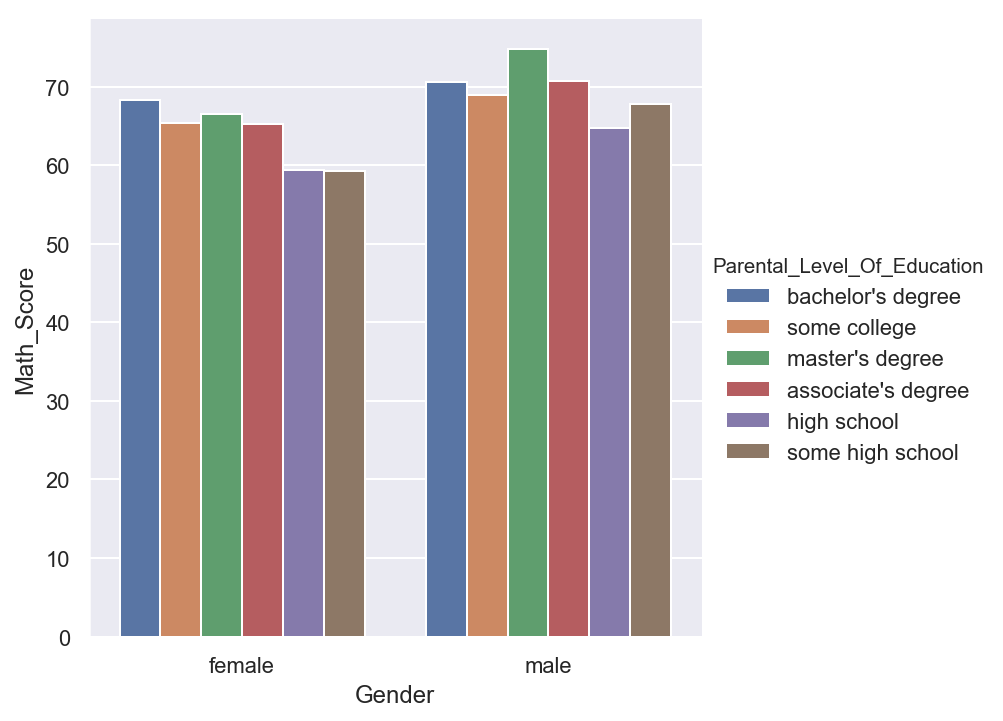

In [686]:
sns.catplot(data= data, y= 'Math_Score',
            x= 'Gender',
            hue= 'Parental_Level_Of_Education',
            kind= 'bar',ci= None);



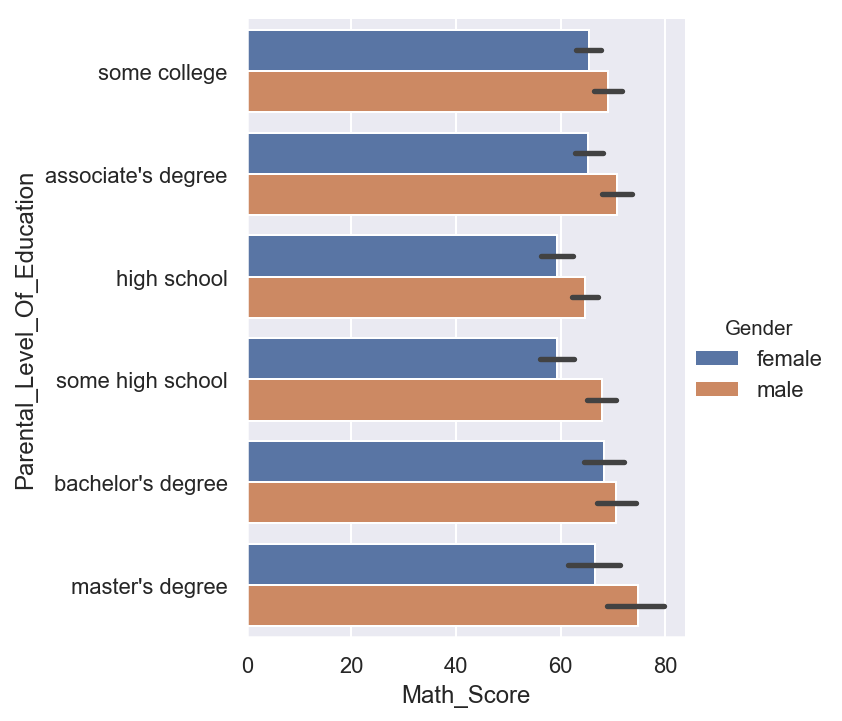

In [687]:
# changing the order

education_order = ["some college", "associate's degree", "high school",
                  "some high school", "bachelor's degree", "master's degree"]

sns.catplot(data= data, x= 'Math_Score',
            hue= 'Gender',
            y= 'Parental_Level_Of_Education',
            kind= 'bar',
            order= education_order);
plt.show()

### 3.3 Qualitative vs. Qualitative

#### Count plot 

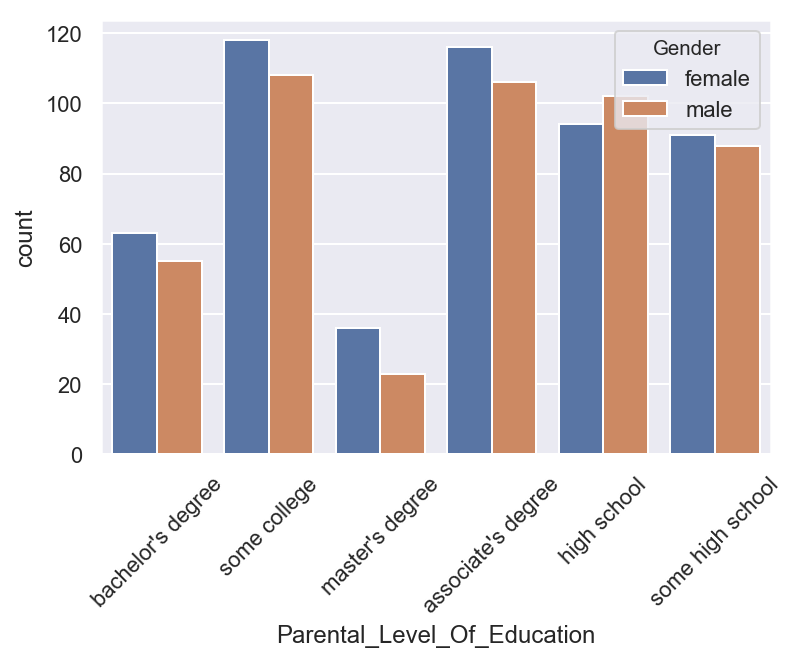

In [688]:
sns.countplot(data= data,x='Parental_Level_Of_Education',hue= 'Gender')
plt.xticks(rotation= 45);

# plt.xticks(size=7); # or decrease the font size

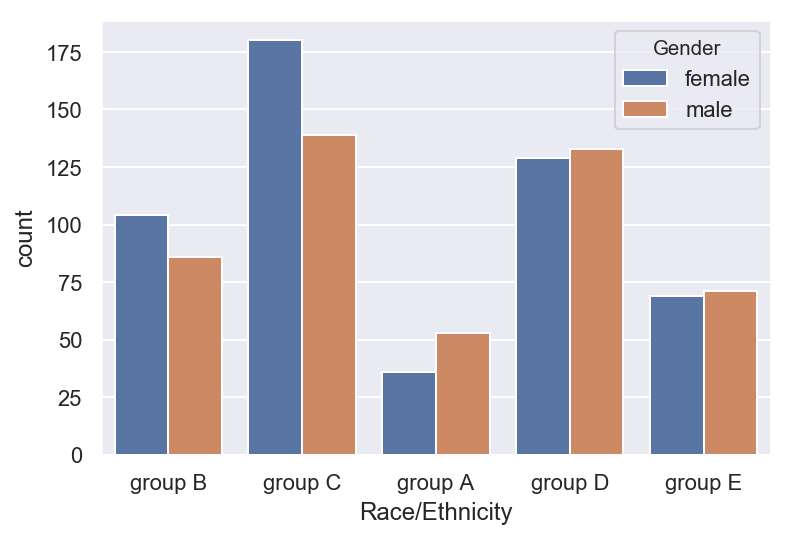

In [689]:
sns.countplot(data= data,x='Race/Ethnicity',hue= 'Gender');

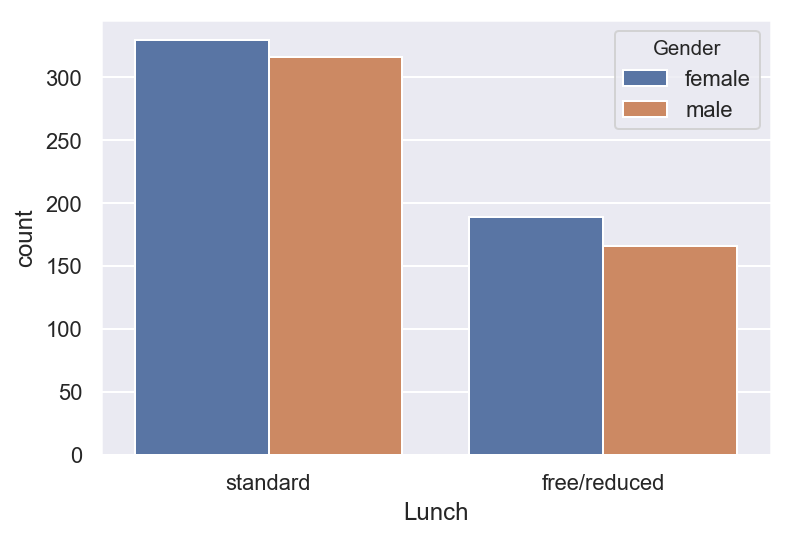

In [690]:
sns.countplot(data= data,x='Lunch',hue= 'Gender');

#### Contingency table "cross tabulation"

It shows a multivariate frequency distribution of categorical variables in tabular form. 

In [691]:
pd.crosstab(data['Race/Ethnicity'], data['Gender']).T

Race/Ethnicity,group A,group B,group C,group D,group E
Gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


In [692]:
pd.crosstab(data['Parental_Level_Of_Education'], data['Gender']).T

Parental_Level_Of_Education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
Gender,,,,,,
female,116,63,94,36,118,91
male,106,55,102,23,108,88


#### Group by

In [693]:
data.groupby(['Parental_Level_Of_Education'])[numerical_features].agg([np.mean]).T


,Parental_Level_Of_Education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
Math_Score,mean,67.882883,69.389831,62.137755,69.745763,67.128319,63.497207
Reading_Score,mean,70.927928,73.000000,64.704082,75.372881,69.460177,66.938547
Writing_Score,mean,69.896396,73.381356,62.448980,75.677966,68.840708,64.888268


### 4. Feature Engineering 
We will calculate each student will pass in each exam by make a `passmark` as an indicator of success and categorize each student within all exam by `GPA`

**we will set the minimum marks to `40` to pass in a exam**

In [694]:
passmark = 40

In [695]:
data.describe()

,Math_Score,Reading_Score,Writing_Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


as we sow less then `25%` of all students get less than the pass mark

**How many students passed in Math exam?**

In [696]:
data['Pass_Math_Exam'] = (data['Math_Score'] > passmark).map({True: "P",
                                                     False: "F"})

data['Pass_Math_Exam'].value_counts()

P    950
F     50
Name: Pass_Math_Exam, dtype: int64

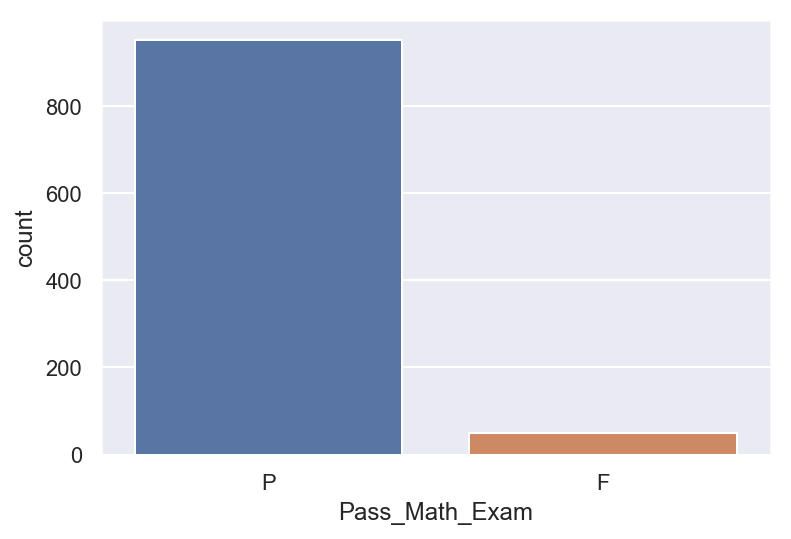

In [697]:
sns.countplot(data=data, x= 'Pass_Math_Exam');


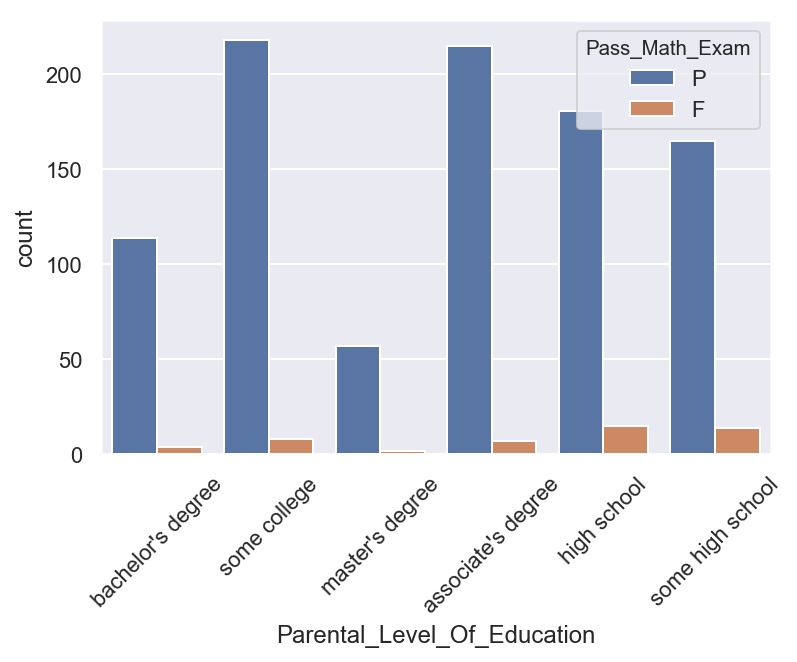

In [698]:
sns.countplot(data=data,x= 'Parental_Level_Of_Education', hue= 'Pass_Math_Exam')
plt.xticks(rotation= 45);


**How many students passed in Reaing exam?**

In [699]:
data['Pass_Reading_Exam'] = (data['Reading_Score'] > passmark).map({True: "P",
                                                     False: "F"})

data['Pass_Reading_Exam'].value_counts()


P    973
F     27
Name: Pass_Reading_Exam, dtype: int64

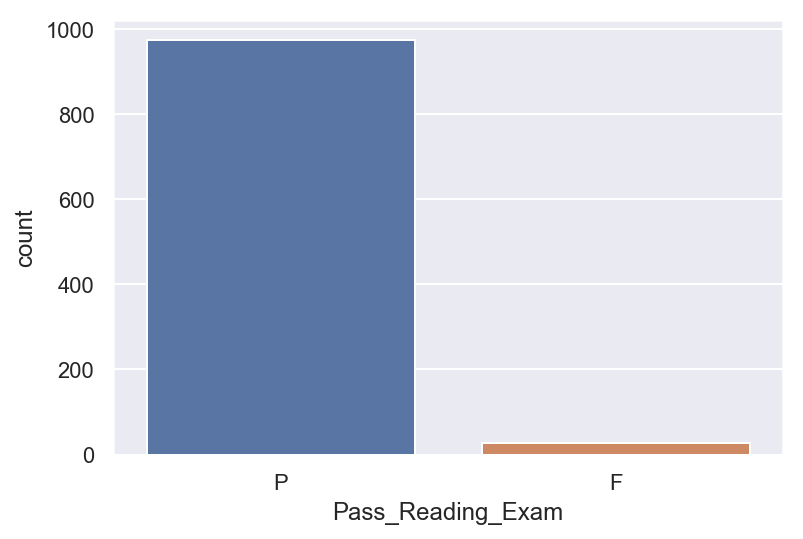

In [700]:
sns.countplot(data=data, x= 'Pass_Reading_Exam');


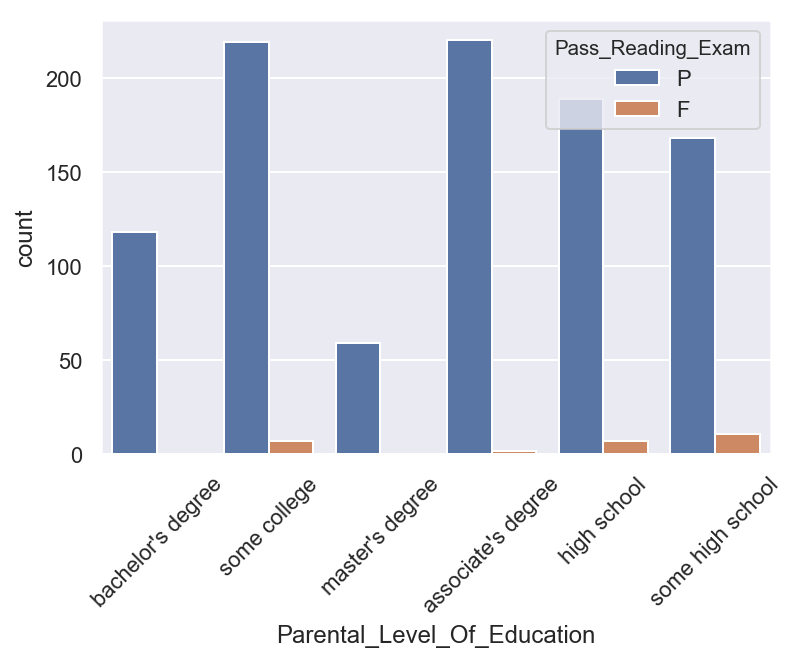

In [701]:
sns.countplot(data=data,x= 'Parental_Level_Of_Education', hue= 'Pass_Reading_Exam')
plt.xticks(rotation= 45);


**How many students passed in Writing exam?**

In [702]:
data['Pass_Writing_Exam'] = (data['Writing_Score'] > passmark).map({True: "P",
                                                     False: "F"})

data['Pass_Writing_Exam'].value_counts()


P    965
F     35
Name: Pass_Writing_Exam, dtype: int64

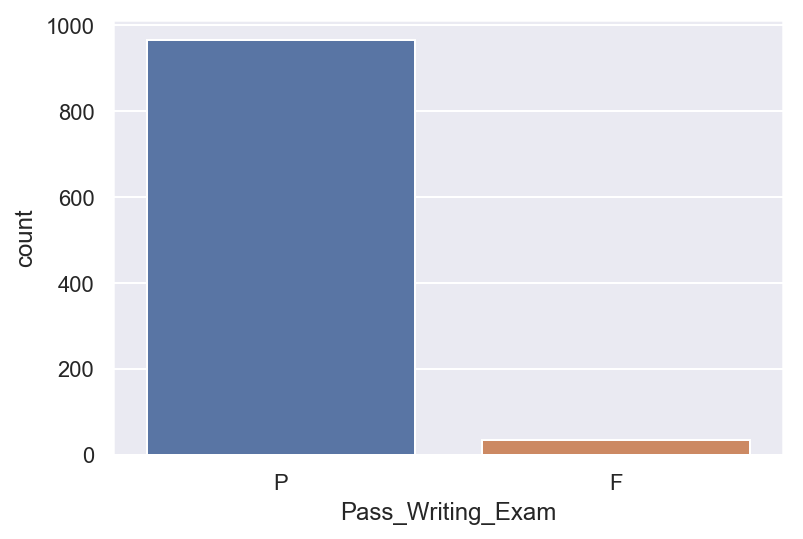

In [703]:
sns.countplot(data=data, x= 'Pass_Writing_Exam');


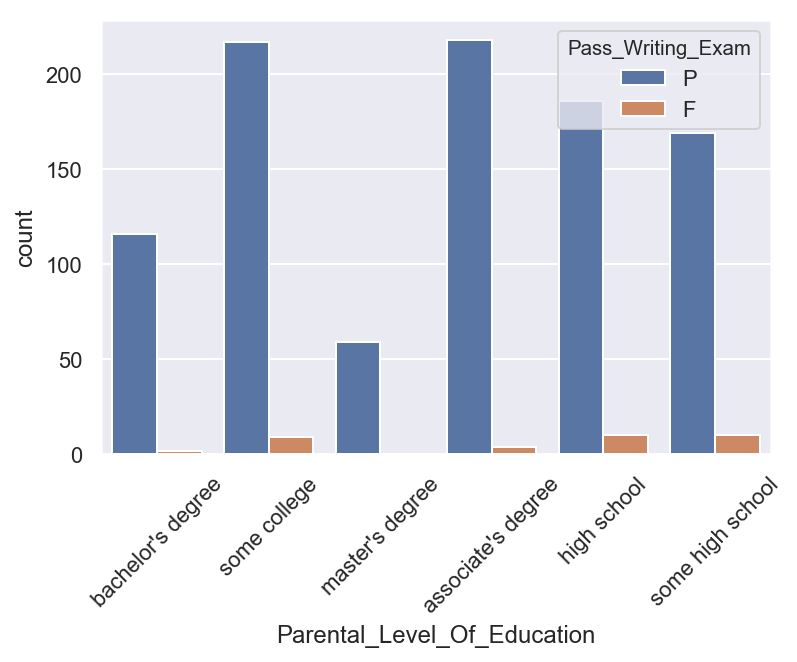

In [704]:
sns.countplot(data=data,x= 'Parental_Level_Of_Education', hue= 'Pass_Writing_Exam')
plt.xticks(rotation= 45);


**How many students pass in all exams?**

In [705]:
data['Overall_Passed'] = data.apply(lambda df:
                                    'P' if df['Pass_Math_Exam'] == 'P' 
                                    or df['Pass_Reading_Exam']  == 'P' 
                                    or df['Pass_Writing_Exam']  == 'P' 
                                    else 'F',
                                    axis=1)
data['Overall_Passed'].value_counts()


P    982
F     18
Name: Overall_Passed, dtype: int64

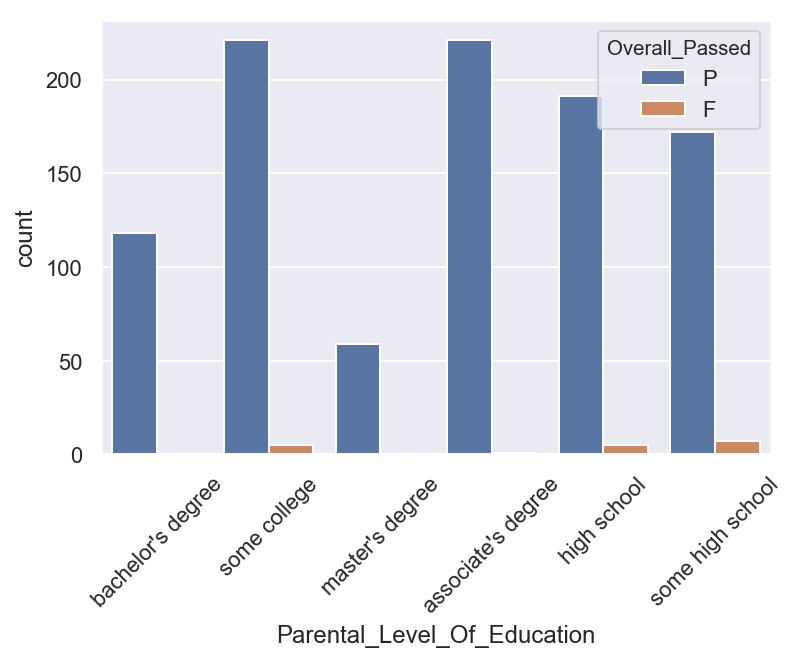

In [706]:
sns.countplot(data= data, hue= 'Overall_Passed',
             x= 'Parental_Level_Of_Education')
plt.xticks(rotation= 45);


In [707]:
pd.crosstab(data['Parental_Level_Of_Education'], data['Overall_Passed']).T

Parental_Level_Of_Education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
Overall_Passed,,,,,,
F,1,0,5,0,5,7
P,221,118,191,59,221,172


**GPA Of Students** 

In [714]:
data['Total_Marks'] = data['Math_Score'] + data['Reading_Score'] + data['Writing_Score']
data['Percentage'] = data['Total_Marks'] / 3.0
data.head()

,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Pass_Math_Exam,Pass_Reading_Exam,Pass_Writing_Exam,Overall_Passed,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333


**Assigning The GPA**

|  GPA  | Grad |
|-------|------|
| **A** | > 80 |
| **B** | > 70 | 
| **C** | > 60 |
| **D** | > 50 | 
| **E** | > 40 |
| **F** | < 40 |


In [722]:
def GetGrade(Percentage):
    if Percentage > 80:
        return 'A'
    elif Percentage > 70:
        return 'B'
    elif Percentage > 60:
        return 'C'
    elif Percentage > 50:
        return 'D'
    elif Percentage > 40:
        return 'E'
    else:
        return 'F'    

In [723]:
data['GPA'] = data.apply(lambda df : GetGrade(df['Percentage']), axis= 1)
data.head()                         

,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Pass_Math_Exam,Pass_Reading_Exam,Pass_Writing_Exam,Overall_Passed,Total_Marks,Percentage,GPA
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B


In [725]:
data['GPA'].value_counts().to_frame()

,GPA
C,260
B,253
A,194
D,184
E,77
F,32


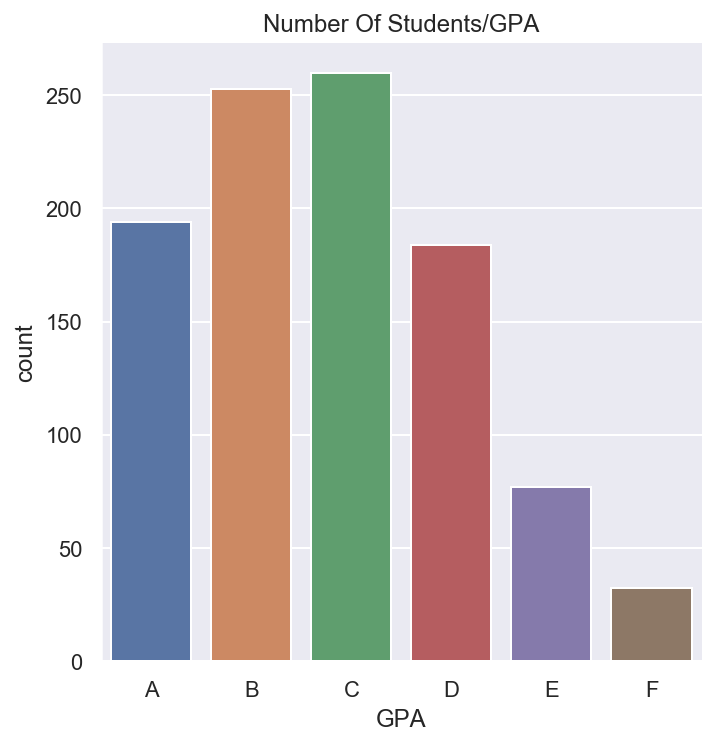

In [742]:
GPA_Order = list("ABCDEF")
sns.catplot(data= data, x= 'GPA',order= GPA_Order, kind= 'count');
plt.title('Number Of Students/GPA');

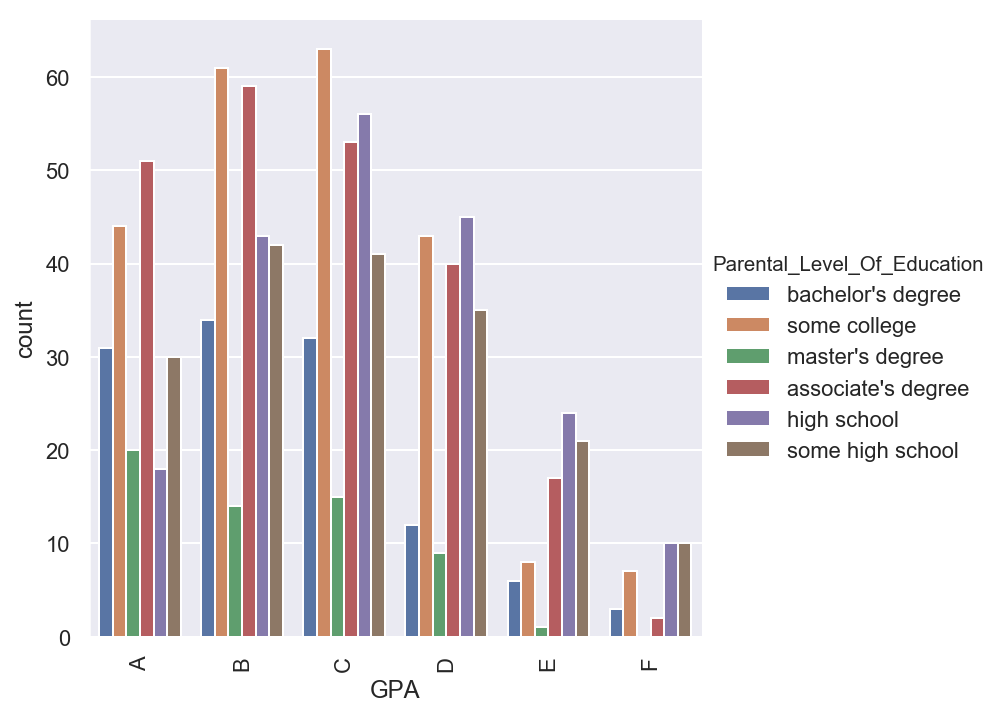

In [749]:
sns.catplot(data= data, hue= 'Parental_Level_Of_Education',
             x= 'GPA', kind='count', order= GPA_Order)
plt.xticks(rotation= 90);

As we sow here when the the parents "`Parental_Level_Of_Education`" get advancied education degree like `Bachelor` or `Master` the children will be more clever and the students will sucess in his\her exams ... And it's a **Positive Correlation**

**If you have any questions, I am ready to answer your questions, and will be happy if you get me feedback for keeping going**.

### 5. Resources
* [Statistics How To](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/)

* [Introduction To Seaborn](https://s3.amazonaws.com/assets.datacamp.com/production/course_15192/slides/chapter3.pdf)
* [Seaborn Tutorial For Beginners](https://www.kaggle.com/kralmachine/seaborn-tutorial-for-beginners)
* [Student Performance In Exams](https://www.kaggle.com/spscientist/student-performance-in-exams)